In [33]:
import deap as dp
import array
import random
import json
import pandas as pd
import numpy as np
import matplotlib as pyplot
%matplotlib inline
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [34]:
# gr*.json contains the distance map in list of list style in JSON format
# Optimal solutions are : gr17 = 2085, gr24 = 1272, gr120 = 6942
with open("gr17.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

distance_map = tsp["DistanceMatrix"]
IND_SIZE = tsp["TourSize"]

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)


In [35]:
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.25)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)

In [36]:
# main() exposed

random.seed(169)

pop = toolbox.population(n=1000)

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

result_object=algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 40, stats=stats, 
                    halloffame=hof)

gen	nevals	avg    	std    	min 	max 
0  	1000  	4676.62	425.366	3237	5842
1  	775   	4359.06	538.795	2646	6400
2  	762   	3989.42	573.583	2223	5914
3  	766   	3566.48	566.148	1922	5824
4  	724   	3132.33	505.357	1359	5046
5  	753   	2776.71	501.908	1198	5029
6  	773   	2418.42	466.735	1148	4231
7  	799   	2072.54	417.568	694 	3708
8  	744   	1789.53	367.856	698 	3570
9  	760   	1531.25	319.035	698 	2744
10 	757   	1306.92	287.277	611 	2592
11 	767   	1110.96	236.803	524 	2327
12 	751   	941.658	181.634	493 	1720
13 	747   	826.712	168.388	391 	1644
14 	769   	717.78 	138.898	282 	1231
15 	772   	628.384	125.196	210 	1363
16 	741   	557.249	115.935	210 	1145
17 	756   	499.571	112.285	210 	1225
18 	751   	439.467	106.262	188 	948 
19 	747   	385.273	93.7848	152 	877 
20 	779   	338.974	90.2497	58  	926 
21 	757   	291.832	81.6547	94  	819 
22 	797   	257.066	74.8101	58  	597 
23 	749   	223.137	70.8822	58  	639 
24 	755   	190.18 	65.013 	58  	529 
25 	741   	166.354	65.1676	58  	470 
2

In [37]:
result_object[1][1]['std']

538.79545008379569

In [38]:
type(result_object[1][1])

dict

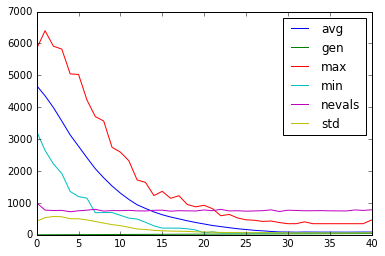

In [39]:
pd.DataFrame(data=result_object[1]).plot()

In [40]:
pd.DataFrame(data=result_object[1]).to_csv

<bound method DataFrame.to_csv of          avg  gen     max     min  nevals         std
0   4676.623    0  5842.0  3237.0    1000  425.365552
1   4359.063    1  6400.0  2646.0     775  538.795450
2   3989.419    2  5914.0  2223.0     762  573.582883
3   3566.479    3  5824.0  1922.0     766  566.147761
4   3132.329    4  5046.0  1359.0     724  505.356778
5   2776.710    5  5029.0  1198.0     753  501.908119
6   2418.417    6  4231.0  1148.0     773  466.735470
7   2072.538    7  3708.0   694.0     799  417.567741
8   1789.533    8  3570.0   698.0     744  367.856231
9   1531.253    9  2744.0   698.0     760  319.035382
10  1306.921   10  2592.0   611.0     757  287.276506
11  1110.962   11  2327.0   524.0     767  236.802691
12   941.658   12  1720.0   493.0     751  181.633843
13   826.712   13  1644.0   391.0     747  168.387889
14   717.780   14  1231.0   282.0     769  138.897637
15   628.384   15  1363.0   210.0     772  125.196024
16   557.249   16  1145.0   210.0     741  115.9

In [41]:
result_object[1][3]

{'avg': 3566.4789999999998,
 'gen': 3,
 'max': 5824.0,
 'min': 1922.0,
 'nevals': 766,
 'std': 566.14776124170976}

In [42]:
df = pd.DataFrame().from_dict(result_object[1])

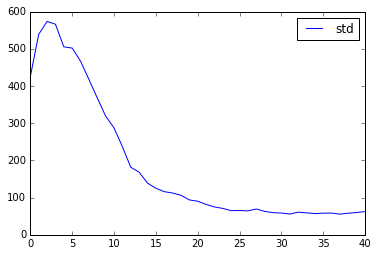

In [43]:
df.plot(y='std')

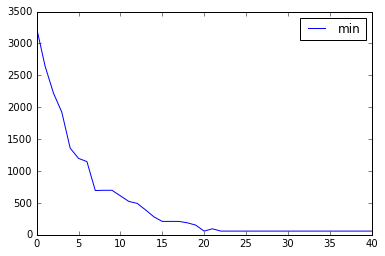

In [44]:
df.plot(y='min')

In [45]:
pop

[array('i', [6, 6, 6, 16, 16, 16, 16, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]),
 array('i', [6, 6, 6, 6, 6, 6, 16, 16, 16, 6, 6, 6, 16, 6, 6, 6, 6]),
 array('i', [6, 6, 6, 16, 16, 16, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6, 6]),
 array('i', [16, 6, 6, 16, 16, 16, 6, 6, 16, 16, 16, 6, 16, 16, 16, 6, 16]),
 array('i', [6, 6, 6, 16, 16, 16, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6, 6]),
 array('i', [16, 6, 16, 6, 6, 16, 6, 6, 6, 16, 6, 6, 6, 16, 6, 16, 6]),
 array('i', [6, 6, 6, 6, 16, 16, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6, 6]),
 array('i', [6, 6, 6, 6, 16, 16, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6, 6]),
 array('i', [6, 6, 6, 6, 16, 16, 16, 6, 16, 16, 6, 6, 6, 6, 16, 6, 6]),
 array('i', [6, 6, 6, 6, 6, 6, 6, 16, 16, 16, 6, 16, 6, 6, 16, 6, 6]),
 array('i', [6, 6, 6, 6, 16, 16, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6, 6]),
 array('i', [6, 6, 6, 16, 16, 16, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6, 6]),
 array('i', [6, 6, 6, 6, 16, 16, 16, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]),
 array('i', [6, 6, 6, 6, 16, 16, 16, 16, 16, 16, 6, 6, 6

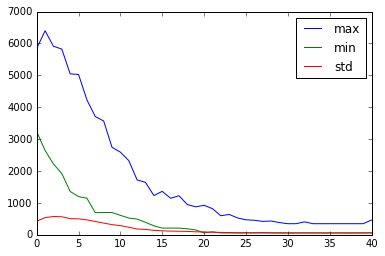

In [46]:
df.plot(y=['max','min','std'])

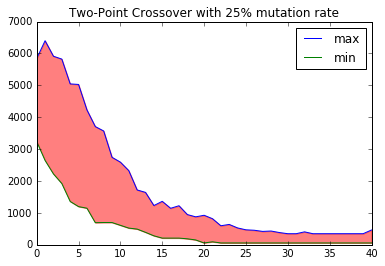

In [47]:

a=df.plot(y=['max','min'],title='Two-Point Crossover with 25% mutation rate')
a.fill_between(xrange(0,41),df['min'],df['max'],color='red',alpha='0.5')
# a.savefig(fname='2ptCx05',format='png')
# a.Figure.savefig(fname='2ptCx05',format='png')
# save("twoPtCx05", ext="png", close=False, verbose=True)
# s

In [48]:
a.fill_between(xrange(0,41),df['min'],df['max'],color='grey',alpha='0.5')